In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv("india.csv")
data

,home,away,date,gh,ga,full_time,competition,home_ident,away_ident,home_country,away_country,home_code,away_code,home_continent,away_continent,continent,level
0,Jct FC,Mohun Bagan Ac,1999-01-05,0,0,F,india,Jct FC (India),Mohun Bagan Ac (India),india,india,IN,IN,Asia,Asia,Asia,national
1,Tollygunge Agragami,Air India,1999-01-06,3,0,F,india,Tollygunge Agragami (India),Air India (India),india,india,IN,IN,Asia,Asia,Asia,national
2,Dempo SC,Churchill Brothers,1999-01-06,0,0,F,india,Dempo SC (India),Churchill Brothers (India),india,india,IN,IN,Asia,Asia,Asia,national
3,Indian Telephone Ind,Indian Bank,1999-01-06,1,0,F,india,Indian Telephone Ind (India),Indian Bank (India),india,india,IN,IN,Asia,Asia,Asia,national
4,Salgaocar FC,Mahindra United,1999-01-07,3,0,F,india,Salgaocar FC (India),Mahindra United (India),india,india,IN,IN,Asia,Asia,Asia,national
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2625,Shillong Lajong FC,Mohun Bagan Ac,2019-03-08,2,3,F,india,Shillong Lajong FC (India),Mohun Bagan Ac (India),india,india,IN,IN,Asia,Asia,Asia,national
2626,Neroca,Real Kashmir,2019-03-09,2,3,F,india,Neroca (India),Real Kashmir (India),india,india,IN,IN,Asia,Asia,Asia,national
2627,Aizawl FC,Churchill Brothers,2019-03-09,2,1,F,india,Aizawl FC (India),Churchill Brothers (India),india,india,IN,IN,Asia,Asia,Asia,national
2628,Gokulam,East Bengal Club FC,2019-03-09,1,2,F,india,Gokulam (India),East Bengal Club FC (India),india,india,IN,IN,Asia,Asia,Asia,national


In [4]:
data.describe()

,gh,ga
count,2630.000000,2630.00000
mean,1.429278,1.10038
std,1.350703,1.10971
min,0.000000,0.00000
25%,0.000000,0.00000
50%,1.000000,1.00000
75%,2.000000,2.00000
max,14.000000,8.00000


In [5]:
data[data['gh'] == 14]

,home,away,date,gh,ga,full_time,competition,home_ident,away_ident,home_country,away_country,home_code,away_code,home_continent,away_continent,continent,level
1634,Dempo SC,Air India,2011-05-30,14,0,F,india,Dempo SC (India),Air India (India),india,india,IN,IN,Asia,Asia,Asia,national


In [6]:
data[data['ga'] == 8]

,home,away,date,gh,ga,full_time,competition,home_ident,away_ident,home_country,away_country,home_code,away_code,home_continent,away_continent,continent,level
1682,Hindustan Aeronautics Limited SC,East Bengal Club FC,2011-11-23,1,8,F,india,Hindustan Aeronautics Limited SC (India),East Bengal Club FC (India),india,india,IN,IN,Asia,Asia,Asia,national


In [7]:
home = data[(data['gh'] > data['ga'])]

home = home['home'].value_counts().rename_axis('Team').reset_index(name='points')

home["points"] = 3 * home["points"]

away = data[(data['ga'] > data['gh'])]

away = away['away'].value_counts().rename_axis('Team').reset_index(name='points')

away["points"] = 3 * away["points"]

drawdata = data[(data['ga'] == data['gh'])]

draw = drawdata[['home','away']].stack().value_counts().rename_axis('Team').reset_index(name='points')

home1 = home[home.Team != 'Glossop North End'].sort_values(by='Team', ascending=True).reset_index()

draw1 = draw[draw.Team != 'Glossop North End'].sort_values(by='Team', ascending=True).reset_index()

away1 = away.sort_values('Team').reset_index()

total = draw1['points'] + home1['points'] + away1['points']

aggregate = total.rename_axis('Team').reset_index(name='points')

aggregate['Team'] = home1['Team']

aggregate.sort_values(by='points', ascending = False).head(10)

,Team,points
7,Churchill Brothers,650.0
10,East Bengal Club FC,562.0
21,Mohun Bagan Ac,532.0
31,Salgaocar FC,489.0
18,Jct FC,392.0
8,Dempo SC,341.0
6,Chirag United SC,328.0
20,Mohammedan SC,307.0
9,Dsk Shivajians,291.0
33,Sporting Goa,272.0


<AxesSubplot:xlabel='Team'>

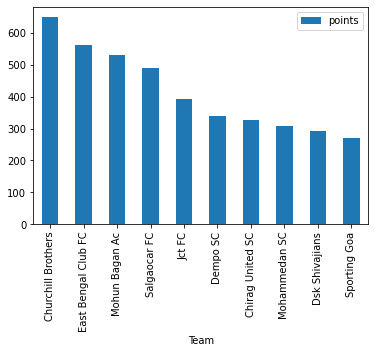

In [8]:
aggregate.sort_values(by='points', ascending = False).head(10).plot.bar(x='Team')

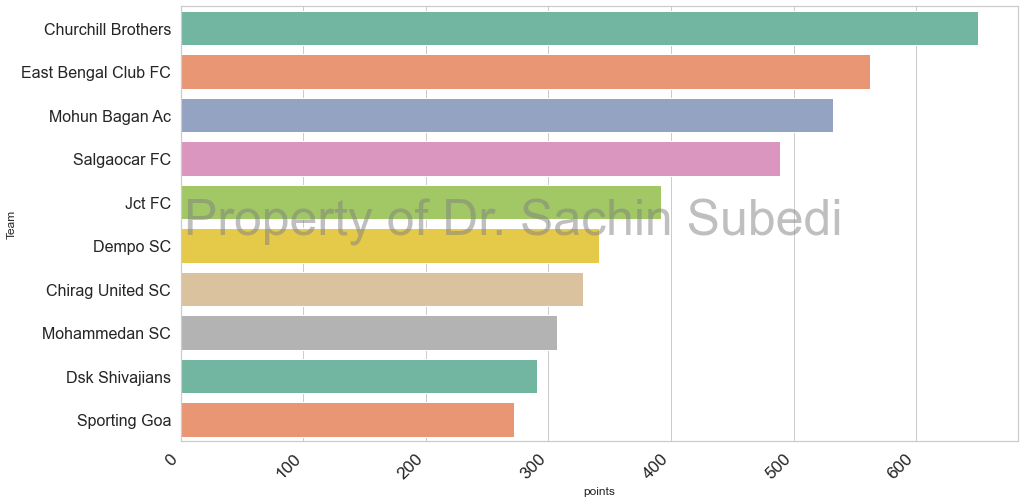

In [9]:
top = aggregate.sort_values(by='points', ascending = False).head(10)

sns.set(style="whitegrid")

plt.figure(figsize=(15,8))

sns.barplot(data = top, x = 'points', y = 'Team', palette='Set2')

plt.xticks(

    rotation=45,

    horizontalalignment='right',

    fontweight='light',

    fontsize='x-large' 

)

plt.yticks(

    fontweight='light',

    fontsize='16' 

)

plt.text(3, 5, 'Property of Dr. Sachin Subedi',

         fontsize=50, color='gray',

       va='bottom', alpha=0.5)

plt.show()



In [10]:
data[['home','away']].stack().value_counts().rename_axis('Team').reset_index(name='counts')

,Team,counts
0,East Bengal Club FC,447
1,Mohun Bagan Ac,447
2,Churchill Brothers,394
3,Salgaocar FC,351
4,Dempo SC,321
5,Jct FC,279
6,Sporting Goa,257
7,Mahindra United,243
8,Air India,211
9,Mumbai FC,204
